# Data Loading

In [ ]:
!git clone https://github.com/icomse/5th_workshop_MachineLearning.git
import os
os.chdir('5th_workshop_MachineLearning/data')

Saving 10953_2022_1156_MOESM1_ESM.xlsx to 10953_2022_1156_MOESM1_ESM.xlsx


In [ ]:
# Now we use pandas library to create a dataframe.
import pandas as pd
# loading chlorine dataset
df_cl = pd.read_excel('DES_SurfaceTension.xlsx', sheet_name='model1 (QSPR Cl)')
# We can see that out preferred column headers are on the 3rd row (index no.2) of the dataframe. Let's rename our column headers.
df_cl = df_cl.rename(columns= dict(df_cl.iloc[2]))
# Our data starts from 3rd row, look at the No. column. Let's start from No. = 1
df_cl = df_cl[3:]
# Let's use the No. column as our index
df_cl = df_cl.set_index('No.')
# We see a lot of NaN values, they are basically blank cells in the excel sheet that we loaded. Let's get rid of them step by step.
# First let's aim for columns where all the values are NaN
df_cl = df_cl.dropna(axis = 1,how='all')
# Now let's remove rows that have NaN values in any of it's cells. There should be no NaN in our dataframe
df_cl = df_cl.dropna(axis = 0,how='any')
# Wait, there's a NaN in our column header. This column is a part of HBA, so let's add this to HBA and get rid the NaN column.
df_cl.iloc[:,0] = df_cl.iloc[:,0] + df_cl.iloc[:,1]
# But how do we say get rid of NaN column? NaN is not a string. What we can do is access it through the numpy library.
import numpy as np
df_cl = df_cl.drop(columns=[np.nan])
# The dataset also contains some pre calculated descriptors, predictions, standard deviations, etc. But we only need some of them.
columns_to_keep = ['HBA', 'HBD', 'EXP. Data', 'Status', 'HBA:HBD']
df_cl.columns = [x.strip() for x in df_cl.columns] # to get rid of possible whitespaces in the column name
df_cl = df_cl[columns_to_keep]
df_cl

,HBA,HBD,EXP. Data,Status,HBA:HBD
No.,,,,,
1.0,choline chloride,ethylene glycol,56.3,Training,0.5
2.0,choline chloride,ethylene glycol,56.2,Training,0.5
3.0,choline chloride,ethylene glycol,55.95,Training,0.5
4.0,choline chloride,ethylene glycol,55.85,Training,0.5
5.0,choline chloride,ethylene glycol,55.75,Training,0.5
...,...,...,...,...,...
597.0,cholinechloride,glycerol,46.4,Test,0.429
598.0,Choline chloride,D-Fructose,64.4,Test,1
599.0,Choline chloride,D-Fructose,73.6,Test,1.5


In [ ]:
# Maybe exercise!
# Now, Let's load the Bromine dataset. Thankfully they are organized similarly to the clorine dataset. So, we can just reuse our previous codes.
import pandas as pd
df_br = pd.read_excel('DES_SurfaceTension.xlsx', sheet_name='model2 (QSPR Br)')
df_br = df_br.rename(columns= dict(df_br.iloc[2]))
df_br = df_br[3:]
df_br = df_br.set_index('No.')
df_br = df_br.dropna(axis = 1,how='all')
df_br = df_br.dropna(axis = 0,how='any')
df_br.iloc[:,0] = df_br.iloc[:,0] + df_br.iloc[:,1]
import numpy as np
df_br = df_br.drop(columns=[np.nan])
columns_to_keep = ['HBA', 'HBD', 'EXP. Data', 'Status', 'HBA:HBD']
df_br.columns = [x.strip() for x in df_br.columns]
df_br = df_br[columns_to_keep]
df_br

,HBA,HBD,EXP. Data,Status,HBA:HBD
No.,,,,,
1,tetraethylammoniumbromide,benzilic acid,52.591,Training,1
2,tetraethylammoniumbromide,benzilic acid,51.512,Training,1
3,tetraethylammoniumbromide,benzilic acid,49.342,Training,1
4,tetraethylammoniumbromide,benzilic acid,48.221,Training,1
5,tetrapropylammoniumbromide,benzilic acid,46.596,Training,1
...,...,...,...,...,...
176,tetrabutylammoniumbromide,monoethanolamine,34.2,Test,0.2
177,tetrabutylammoniumbromide,monoethanolamine,35.7,Test,0.167
178,Methyl triphenyl phosphuniumbromide,Glycerol,58.94,Test,0.333


In [ ]:
# Let's add these two datasets
df = pd.concat([df_cl, df_br], ignore_index = True)
df

,HBA,HBD,EXP. Data,Status,HBA:HBD
0,choline chloride,ethylene glycol,56.3,Training,0.5
1,choline chloride,ethylene glycol,56.2,Training,0.5
2,choline chloride,ethylene glycol,55.95,Training,0.5
3,choline chloride,ethylene glycol,55.85,Training,0.5
4,choline chloride,ethylene glycol,55.75,Training,0.5
...,...,...,...,...,...
775,tetrabutylammoniumbromide,monoethanolamine,34.2,Test,0.2
776,tetrabutylammoniumbromide,monoethanolamine,35.7,Test,0.167
777,Methyl triphenyl phosphuniumbromide,Glycerol,58.94,Test,0.333
778,Methyltriphenylphosphoniumbromide,Ethanol Amine,40.42,Test,0.125


In [ ]:
#Let's check if there are any duplicated rows
df[df.duplicated(keep=False)]
#There are some, let's remove them
df=df.drop_duplicates()
df = df.reset_index()
df

,index,HBA,HBD,EXP. Data,Status,HBA:HBD
0,0,choline chloride,ethylene glycol,56.3,Training,0.5
1,1,choline chloride,ethylene glycol,56.2,Training,0.5
2,2,choline chloride,ethylene glycol,55.95,Training,0.5
3,3,choline chloride,ethylene glycol,55.85,Training,0.5
4,4,choline chloride,ethylene glycol,55.75,Training,0.5
...,...,...,...,...,...,...
766,775,tetrabutylammoniumbromide,monoethanolamine,34.2,Test,0.2
767,776,tetrabutylammoniumbromide,monoethanolamine,35.7,Test,0.167
768,777,Methyl triphenyl phosphuniumbromide,Glycerol,58.94,Test,0.333
769,778,Methyltriphenylphosphoniumbromide,Ethanol Amine,40.42,Test,0.125


# Data Cleaning

Text(0.5, 1.0, 'HBD distribution')

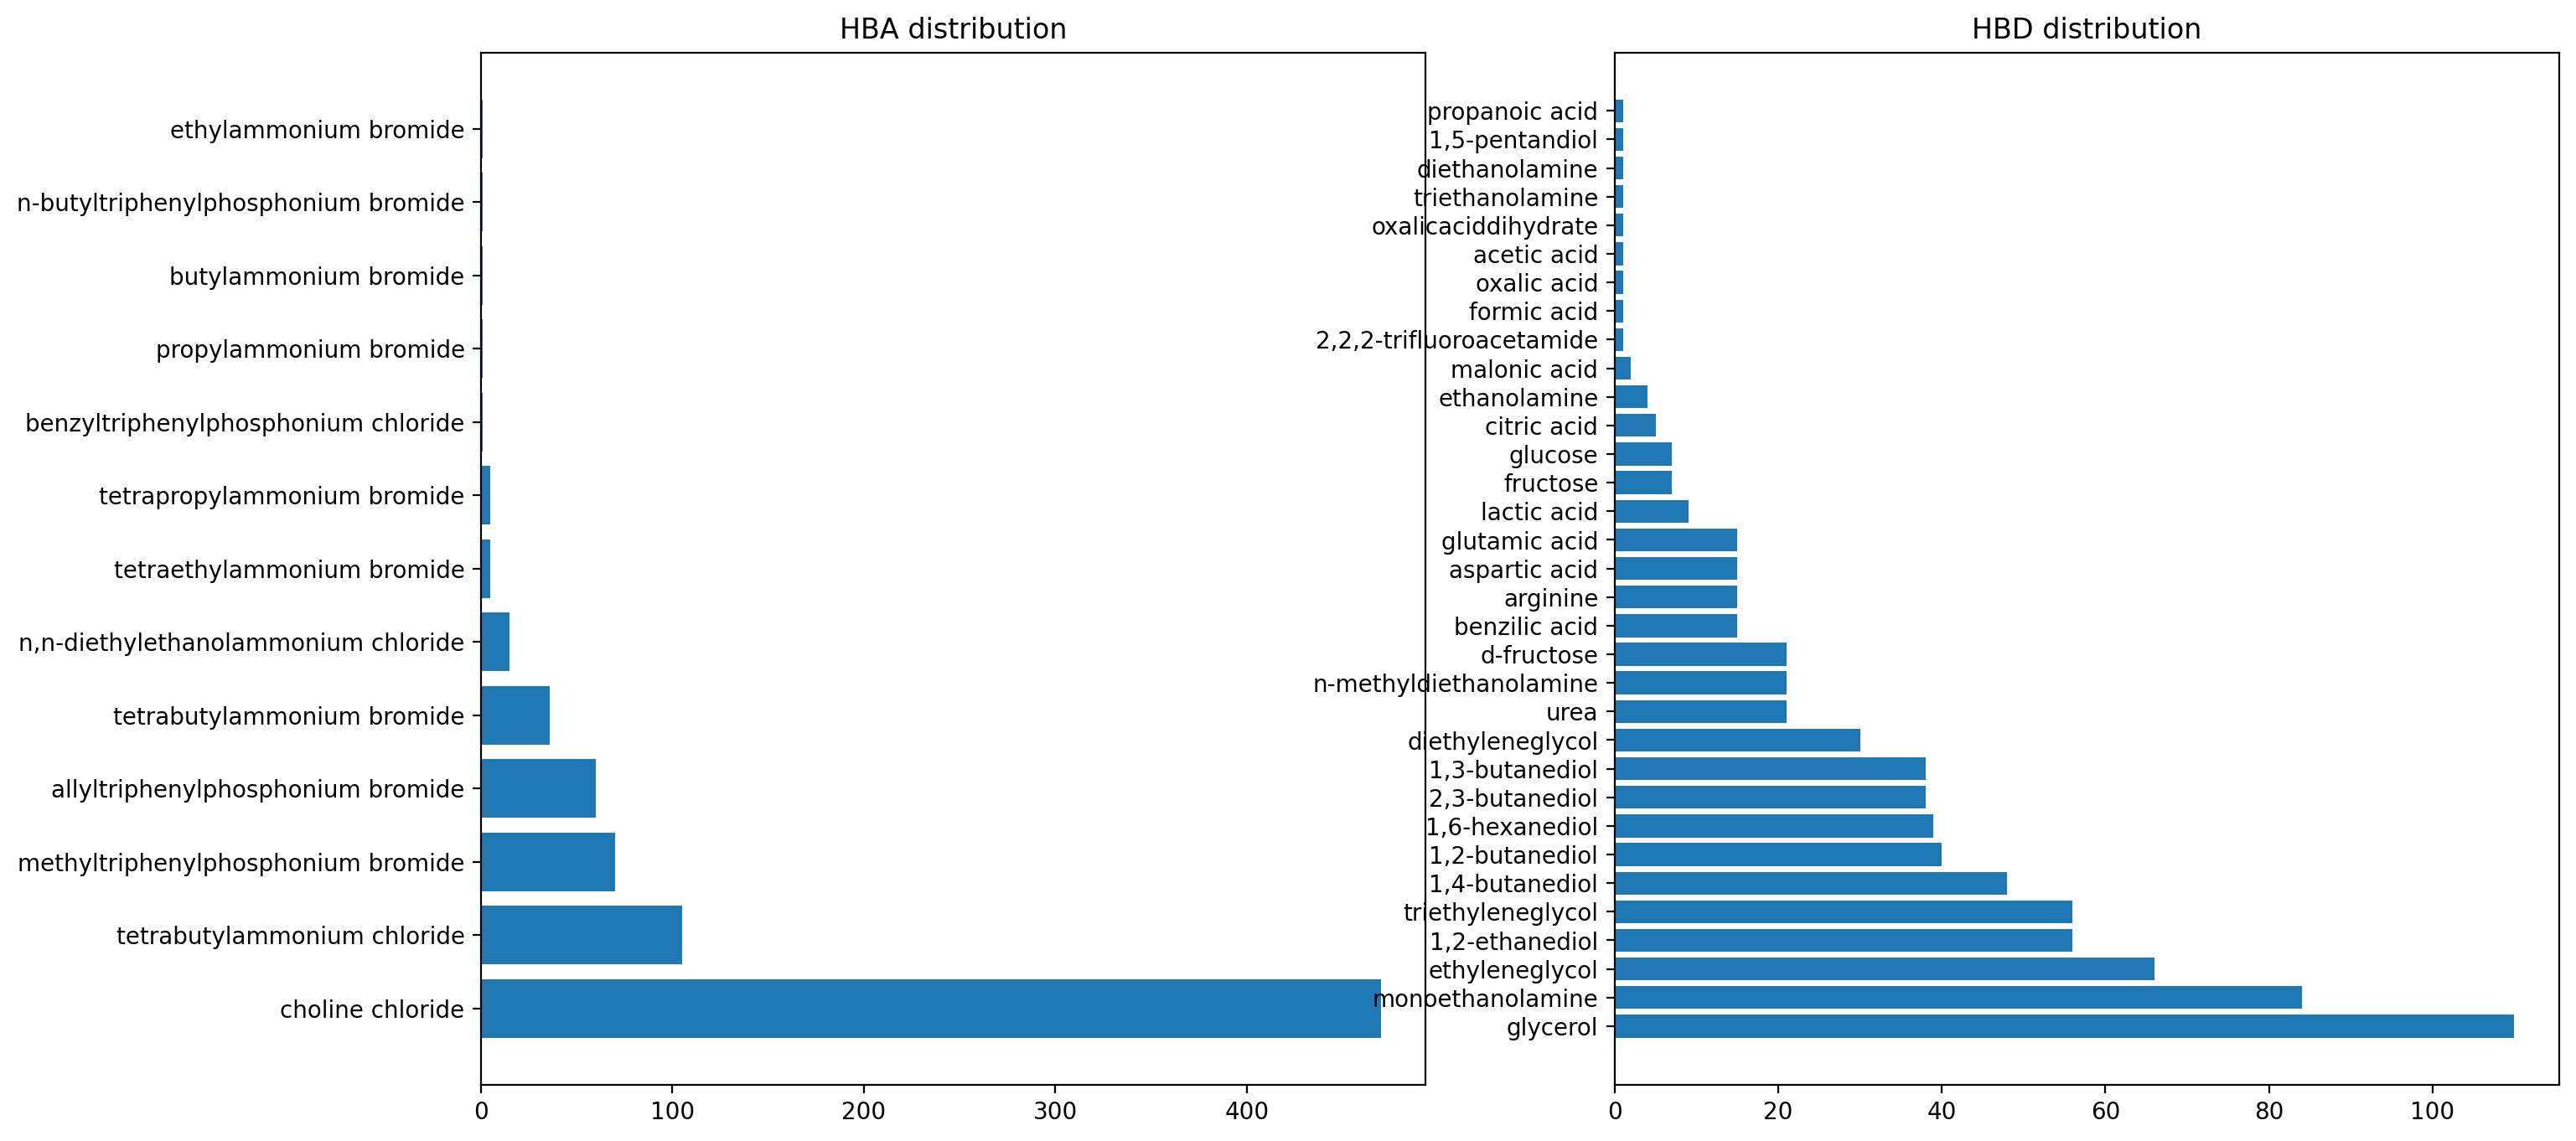

In [ ]:
# Let's start with HBAs
df['HBA'] = df['HBA'].str.lower() #First, let's make them all smaller case to make them case insensitive
df['HBA'] = df['HBA'].str.split(' ').str.join('') #first, we'll get rid of all the spaces and make them one word
df['HBA'] = df['HBA'].str.replace('chloride', ' chloride').str.replace('bromide', ' bromide') # now, let's give cation and anion a space
df['HBA'] = df['HBA'].str.replace('-','') # hyphens are causing inconsistencies, let's just get rid of them
#Okay our dataset improved a lot. However, there are still some typos, but it's really difficult to find a pattern here. As it's a small dataset, we can fix them by hardcoding.
df = df.replace({'methyltriphenylphosphium bromide' : 'methyltriphenylphosphonium bromide',                 # Hardcoding to correct some typos
                 'methyltriphenylphosphunium bromide' : 'methyltriphenylphosphonium bromide',
                 'n,ndiethylethanolammonium chloride' : 'n,n-diethylethanolammonium chloride',
                  'nbutyltriphenylphosphonium bromide' : 'n-butyltriphenylphosphonium bromide'})

# we'll do similar works for HBDs
df['HBD'] = df['HBD'].str.lower()
df['HBD'] = df['HBD'].str.split(' ').str.join('')
# we'll hardcode to correct some pesky typos. Some of them like space before acid and no space before aciddihydrate may not make sense now but it's required for SMILES conversion
df['HBD'] = df['HBD'].str.replace('acid',' acid').str.replace(' aciddihydrate','aciddihydrate').replace('1,4butanediol', '1,4-butanediol')


# Let's look at the distribution of HBAs and HBDs in the dataframe
unique_HBA = df['HBA'].value_counts()
unique_HBD = df['HBD'].value_counts()
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8), dpi=200)
ax1.barh(unique_HBA.index, unique_HBA.values)
ax1.set_title("HBA distribution")
ax2.barh(unique_HBD.index, unique_HBD.values)
ax2.set_title("HBD distribution")
# We can see the repetition of some components due to representational differences and typos. Let's fix them. (Go up and uncomment those lines)

# SMILES Conversion

In [ ]:
!pip install pubchempy
import pubchempy as pcp

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=31e7a87013210454ce7280d1f6585abba9ecb3dae7f39a9e914c39c9487e5149
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [ ]:
# When working on Colab, sometimes we faced random errors in smiles conversion. This function was written for a workaround to this problem. If you are not getting errors, this function is not required.
def smiles_workaround(comp):
  try:
    smile = pcp.get_compounds(comp, 'name')[0].isomeric_smiles
  except:
    smile = smiles_workaround(comp)
  return smile

In [ ]:
dict_smiles_HBA = dict()
for i  in df['HBA'].unique():
    try:
        dict_smiles_HBA[i] = pcp.get_compounds(i, 'name')[0].isomeric_smiles
    except:
        print(i, 'Did not work')
        print('Trying again')
        dict_smiles_HBA[i] = smiles_workaround(i)
df['HBA_smiles'] = df['HBA'].replace(dict_smiles_HBA)
df

,index,HBA,HBD,EXP. Data,Status,HBA:HBD,HBA_smiles
0,0,choline chloride,ethyleneglycol,56.30,Training,0.500,C[N+](C)(C)CCO.[Cl-]
1,1,choline chloride,ethyleneglycol,56.20,Training,0.500,C[N+](C)(C)CCO.[Cl-]
2,2,choline chloride,ethyleneglycol,55.95,Training,0.500,C[N+](C)(C)CCO.[Cl-]
3,3,choline chloride,ethyleneglycol,55.85,Training,0.500,C[N+](C)(C)CCO.[Cl-]
4,4,choline chloride,ethyleneglycol,55.75,Training,0.500,C[N+](C)(C)CCO.[Cl-]
...,...,...,...,...,...,...,...
766,775,tetrabutylammonium bromide,monoethanolamine,34.20,Test,0.200,CCCC[N+](CCCC)(CCCC)CCCC.[Br-]
767,776,tetrabutylammonium bromide,monoethanolamine,35.70,Test,0.167,CCCC[N+](CCCC)(CCCC)CCCC.[Br-]
768,777,methyltriphenylphosphonium bromide,glycerol,58.94,Test,0.333,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-]
769,778,methyltriphenylphosphonium bromide,ethanolamine,40.42,Test,0.125,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-]


In [ ]:
# maybe exercise!
dict_smiles_HBD = dict()
for i  in df['HBD'].unique():
    try:
        dict_smiles_HBD[i] = pcp.get_compounds(i, 'name')[0].isomeric_smiles
    except:
        print(i, 'Did not work')
        print ('Trying again')
        dict_smiles_HBD[i] = smiles_workaround(i)
df['HBD_smiles'] = df['HBD'].replace(dict_smiles_HBD)
df

,index,HBA,HBD,EXP. Data,Status,HBA:HBD,HBA_smiles,HBD_smiles
0,0,choline chloride,ethyleneglycol,56.30,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O
1,1,choline chloride,ethyleneglycol,56.20,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O
2,2,choline chloride,ethyleneglycol,55.95,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O
3,3,choline chloride,ethyleneglycol,55.85,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O
4,4,choline chloride,ethyleneglycol,55.75,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O
...,...,...,...,...,...,...,...,...
766,775,tetrabutylammonium bromide,monoethanolamine,34.20,Test,0.200,CCCC[N+](CCCC)(CCCC)CCCC.[Br-],C(CO)N
767,776,tetrabutylammonium bromide,monoethanolamine,35.70,Test,0.167,CCCC[N+](CCCC)(CCCC)CCCC.[Br-],C(CO)N
768,777,methyltriphenylphosphonium bromide,glycerol,58.94,Test,0.333,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-],C(C(CO)O)O
769,778,methyltriphenylphosphonium bromide,ethanolamine,40.42,Test,0.125,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-],C(CO)N


In [ ]:
# Let's see if there are repetitions in SMILES strings
print(len(df['HBA'].unique()) - len(df['HBA_smiles'].unique()))
print(len(df['HBD'].unique()) - len(df['HBD_smiles'].unique()))

0
3


In [ ]:
# There are some repetitions in the HBD column. They have similar SMILES but different IUPAC names. Let's find them
df_temp = pd.DataFrame(dict_smiles_HBD.items())
df_temp[df_temp[1].duplicated(keep=False)]

,0,1
0,ethyleneglycol,C(CO)O
13,fructose,C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
16,monoethanolamine,C(CO)N
18,"1,2-ethanediol",C(CO)O
23,d-fructose,C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
26,ethanolamine,C(CO)N


In [ ]:
# Let's make the naming consistent
df['HBD'] =  df['HBD'].replace({'1,2-ethanediol': 'ethyleneglycol',
                   'd-fructose': 'fructose',
                   'monoethanolamine':'ethanolamine'})
print(len(df['HBD'].unique()) - len(df['HBD_smiles'].unique()))

0


# Data exploration

In [ ]:
!pip install rdkit
from rdkit import Chem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 21.8 MB/s eta 0:00:00


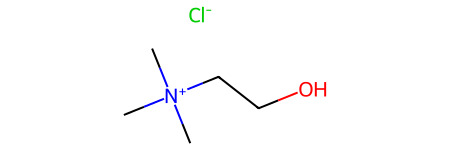

In [ ]:
# visualizing molecules
Chem.MolFromSmiles('C[N+](C)(C)CCO.[Cl-]')

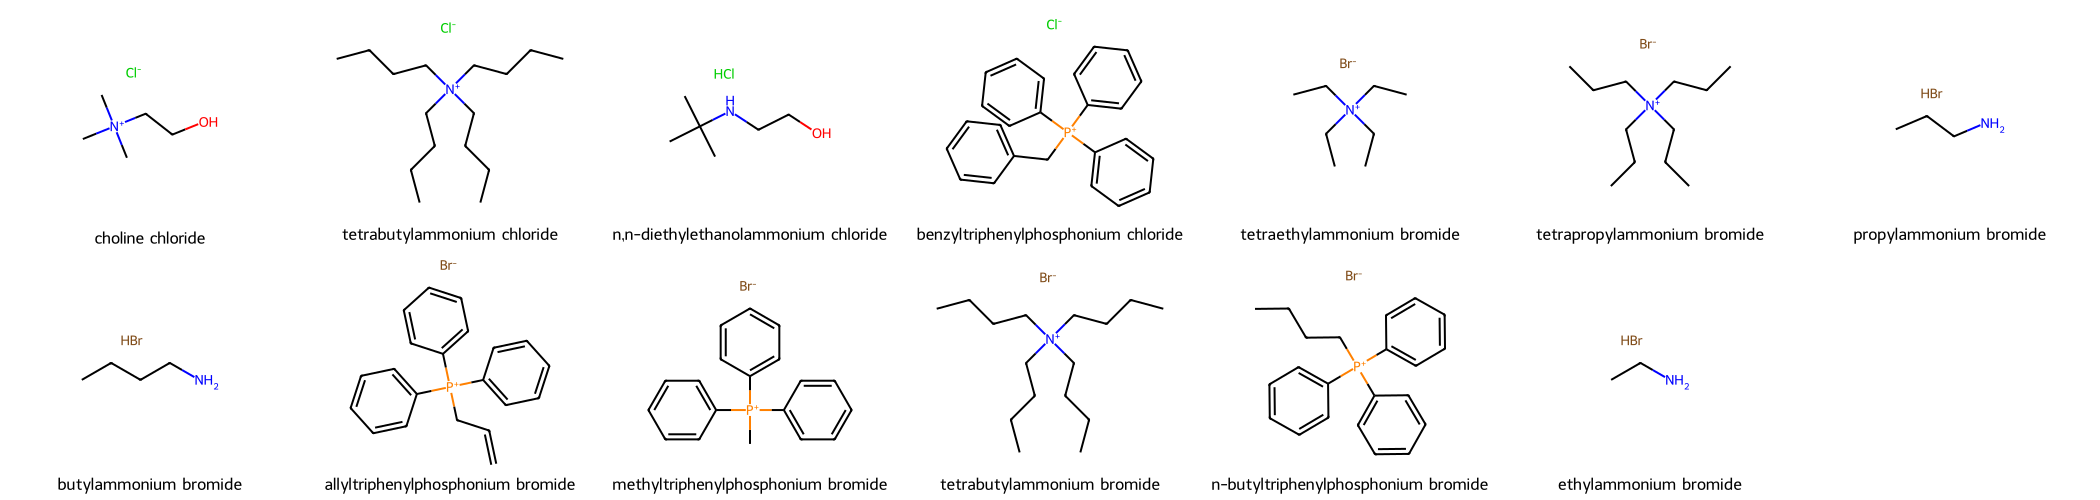

In [ ]:
# We can plot all the HBAs and HBDs to get a better sense of our dataset
HBA_mol = [Chem.MolFromSmiles(x) for x in df['HBA_smiles'].unique()]
HBA_legend = list(df['HBA'].unique())
Chem.Draw.MolsToGridImage(HBA_mol, molsPerRow=7, subImgSize=(300, 250), legends = HBA_legend)

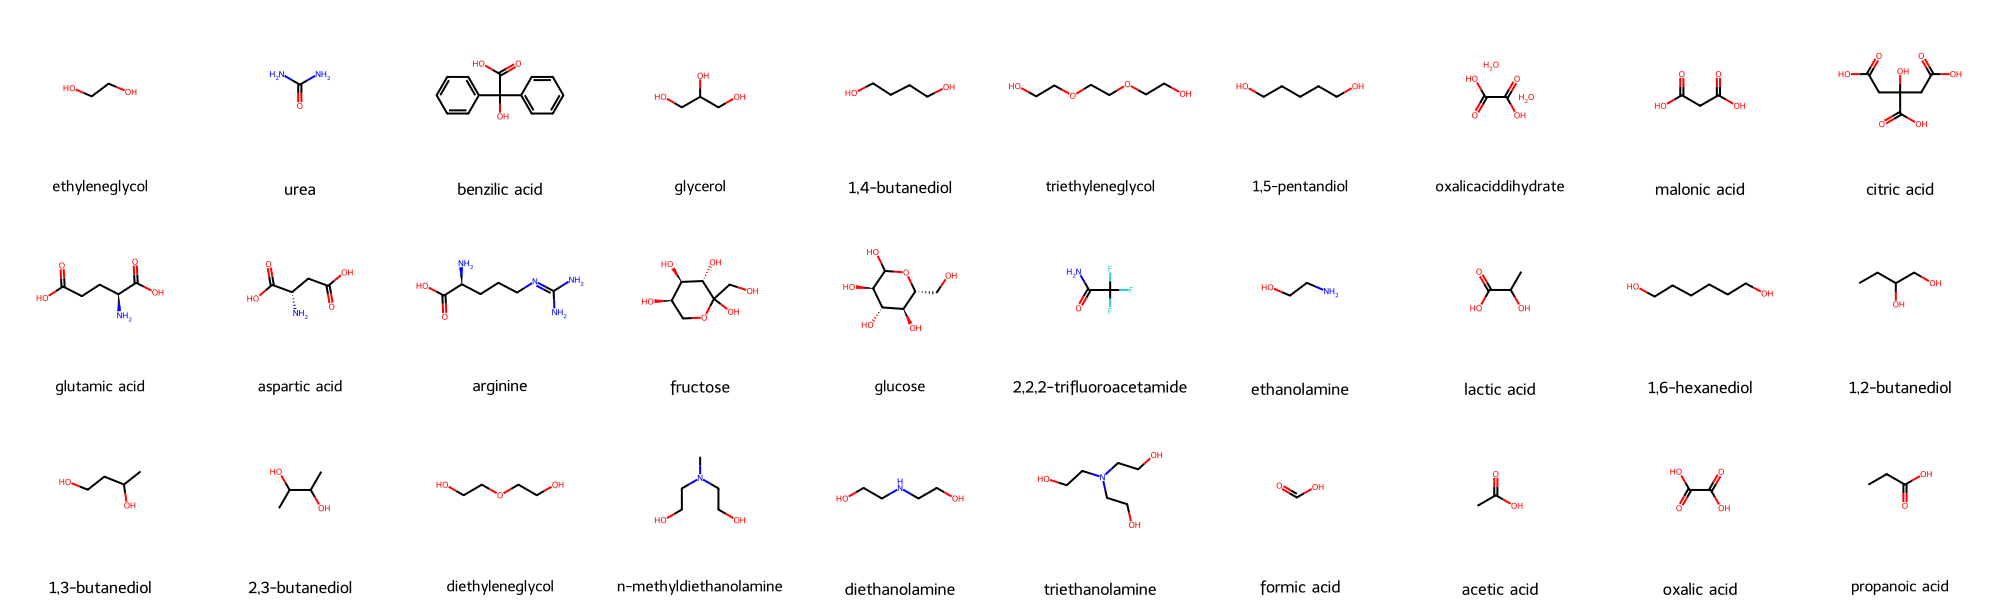

In [ ]:
HBD_mol = [Chem.MolFromSmiles(x) for x in df['HBD_smiles'].unique()]
HBD_legend = list(df['HBD'].unique())
Chem.Draw.MolsToGridImage(HBD_mol, molsPerRow=10, subImgSize=(200, 200), legends = HBD_legend)

In [ ]:
df_sorted = df.sort_values('EXP. Data', ascending = False)
df_sorted

,index,HBA,HBD,EXP. Data,Status,HBA:HBD,HBA_smiles,HBD_smiles
465,474,choline chloride,fructose,75.000,Training,2.500,C[N+](C)(C)CCO.[Cl-],C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
507,516,choline chloride,fructose,74.005,Test,2.000,C[N+](C)(C)CCO.[Cl-],C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
588,597,choline chloride,fructose,73.600,Test,1.500,C[N+](C)(C)CCO.[Cl-],C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
590,599,choline chloride,fructose,73.000,Test,2.500,C[N+](C)(C)CCO.[Cl-],C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
147,147,choline chloride,fructose,71.990,Training,2.000,C[N+](C)(C)CCO.[Cl-],C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
...,...,...,...,...,...,...,...,...
333,338,choline chloride,"1,2-butanediol",31.600,Training,0.053,C[N+](C)(C)CCO.[Cl-],CCC(CO)O
116,116,tetrabutylammonium chloride,glutamic acid,31.500,Training,9.000,CCCC[N+](CCCC)(CCCC)CCCC.[Cl-],C(CC(=O)O)[C@@H](C(=O)O)N
334,339,choline chloride,"1,2-butanediol",31.300,Training,0.053,C[N+](C)(C)CCO.[Cl-],CCC(CO)O
500,509,tetrabutylammonium chloride,glutamic acid,31.200,Test,9.000,CCCC[N+](CCCC)(CCCC)CCCC.[Cl-],C(CC(=O)O)[C@@H](C(=O)O)N


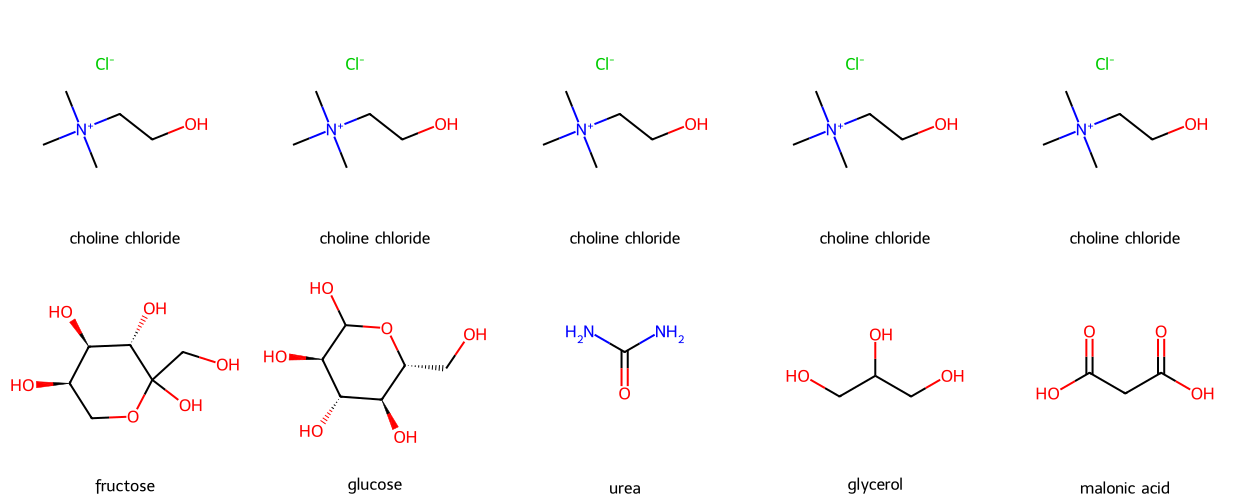

In [ ]:
# We can also plot extreme points
top = df_sorted[['HBA','HBD','HBA_smiles','HBD_smiles']].drop_duplicates().head(5)
top_HBA_mol = [Chem.MolFromSmiles(x) for x in top['HBA_smiles']]
top_HBD_mol = [Chem.MolFromSmiles(x) for x in top['HBD_smiles']]
legends = list(top['HBA']) + list(top['HBD'])
Chem.Draw.MolsToGridImage(top_HBA_mol+top_HBD_mol, molsPerRow=5, subImgSize=(250, 250), legends = legends)

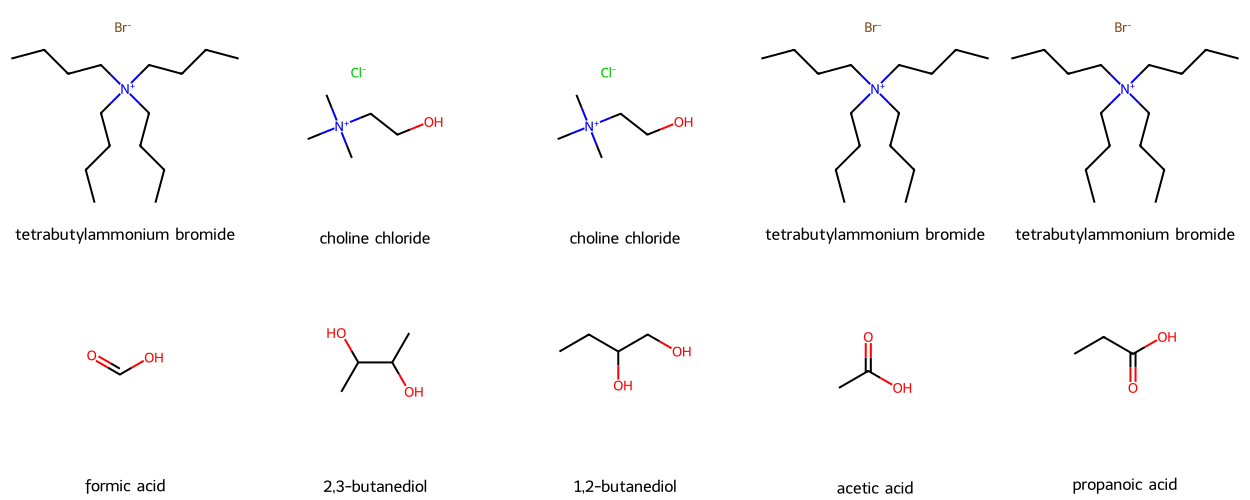

In [ ]:
# and the bottom 10
top = df_sorted[['HBA','HBD','HBA_smiles','HBD_smiles']].drop_duplicates().tail(5)
top_HBA_mol = [Chem.MolFromSmiles(x) for x in top['HBA_smiles']]
top_HBD_mol = [Chem.MolFromSmiles(x) for x in top['HBD_smiles']]
legends = list(top['HBA']) + list(top['HBD'])
Chem.Draw.MolsToGridImage(top_HBA_mol+top_HBD_mol, molsPerRow=5, subImgSize=(250, 250), legends = legends)

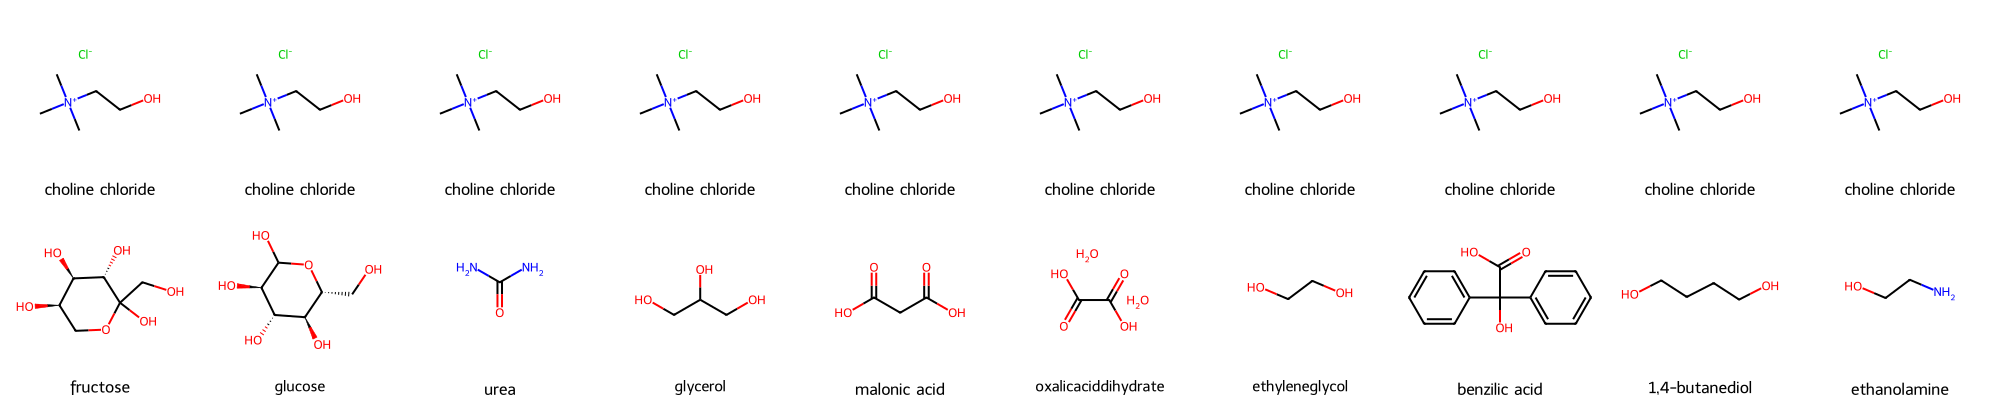

In [ ]:
# We can also fix one component(either HBA or HBD) and vary the other one to see how the target property changes
# Here, in the figure as we go from left to right the surface tension of DES decreases
subset = df_sorted[df_sorted['HBA']=='choline chloride']
top = subset[['HBA','HBD','HBA_smiles','HBD_smiles']].drop_duplicates().head(10)
top_HBA_mol = [Chem.MolFromSmiles(x) for x in top['HBA_smiles']]
top_HBD_mol = [Chem.MolFromSmiles(x) for x in top['HBD_smiles']]
legends = list(top['HBA']) + list(top['HBD'])
Chem.Draw.MolsToGridImage(top_HBA_mol+top_HBD_mol, molsPerRow=10, subImgSize=(200, 200), legends = legends)

<Axes: ylabel='Density'>

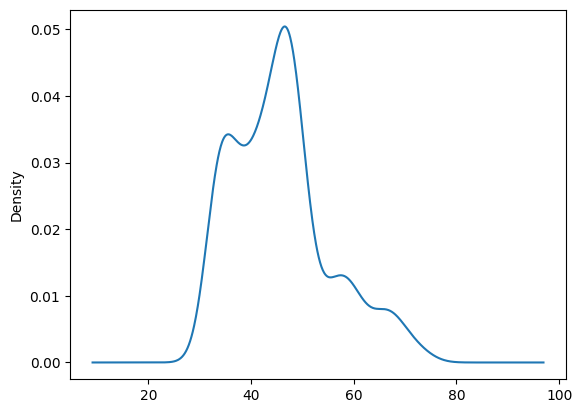

In [ ]:
df['EXP. Data'].plot.density()

# Featurization

In [ ]:
# We'll have to calculate descriptors for HBA and HBD separately. Let's start with HBA
from rdkit.ML.Descriptors import MoleculeDescriptors
mols = [Chem.MolFromSmiles(sm) for sm in df['HBA_smiles']] # we need to convert smiles to rdkit mols
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Chem.Descriptors._descList]) # defining descriptors
desc_name = calc.GetDescriptorNames() #storing descriptor names
descriptors = [calc.CalcDescriptors(mol) for mol in mols] # calculating descriptors
featurizers_HBA = pd.DataFrame(descriptors, columns = ['HBA_'+ x for x in desc_name]) # creating a dataframe to output the descriptor names and values
featurizers_HBA

,HBA_MaxAbsEStateIndex,HBA_MaxEStateIndex,HBA_MinAbsEStateIndex,HBA_MinEStateIndex,HBA_qed,HBA_MolWt,HBA_HeavyAtomMolWt,HBA_ExactMolWt,HBA_NumValenceElectrons,HBA_NumRadicalElectrons,...,HBA_fr_sulfide,HBA_fr_sulfonamd,HBA_fr_sulfone,HBA_fr_term_acetylene,HBA_fr_tetrazole,HBA_fr_thiazole,HBA_fr_thiocyan,HBA_fr_thiophene,HBA_fr_unbrch_alkane,HBA_fr_urea
0,8.386250,8.386250,0.0,0.000000,0.397593,139.626,125.514,139.076392,52,0,...,0,0,0,0,0,0,0,0,0,0
1,8.386250,8.386250,0.0,0.000000,0.397593,139.626,125.514,139.076392,52,0,...,0,0,0,0,0,0,0,0,0,0
2,8.386250,8.386250,0.0,0.000000,0.397593,139.626,125.514,139.076392,52,0,...,0,0,0,0,0,0,0,0,0,0
3,8.386250,8.386250,0.0,0.000000,0.397593,139.626,125.514,139.076392,52,0,...,0,0,0,0,0,0,0,0,0,0
4,8.386250,8.386250,0.0,0.000000,0.397593,139.626,125.514,139.076392,52,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2.327522,2.327522,0.0,0.000000,0.482310,322.375,286.087,321.203112,112,0,...,0,0,0,0,0,0,0,0,0,0
767,2.327522,2.327522,0.0,0.000000,0.482310,322.375,286.087,321.203112,112,0,...,0,0,0,0,0,0,0,0,0,0
768,2.409722,2.409722,0.0,-1.526435,0.603166,357.231,339.087,356.032949,106,0,...,0,0,0,0,0,0,0,0,0,0
769,2.409722,2.409722,0.0,-1.526435,0.603166,357.231,339.087,356.032949,106,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Now for HBD
from rdkit.ML.Descriptors import MoleculeDescriptors
mols = [Chem.MolFromSmiles(sm) for sm in df['HBD_smiles']] # we need to convert smiles to rdkit mols
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Chem.Descriptors._descList]) # defining descriptors
desc_name = calc.GetDescriptorNames() #storing descriptor names
descriptors = [calc.CalcDescriptors(mol) for mol in mols] # calculating descriptors
featurizers_HBD = pd.DataFrame(descriptors, columns = ['HBD_'+ x for x in desc_name]) # creating a dataframe to output the descriptor names and values
featurizers_HBD

,HBD_MaxAbsEStateIndex,HBD_MaxEStateIndex,HBD_MinAbsEStateIndex,HBD_MinEStateIndex,HBD_qed,HBD_MolWt,HBD_HeavyAtomMolWt,HBD_ExactMolWt,HBD_NumValenceElectrons,HBD_NumRadicalElectrons,...,HBD_fr_sulfide,HBD_fr_sulfonamd,HBD_fr_sulfone,HBD_fr_term_acetylene,HBD_fr_tetrazole,HBD_fr_thiazole,HBD_fr_thiocyan,HBD_fr_thiophene,HBD_fr_unbrch_alkane,HBD_fr_urea
0,7.625000,7.625000,0.125000,-0.125000,0.407528,62.068,56.020,62.036779,26,0,...,0,0,0,0,0,0,0,0,0,0
1,7.625000,7.625000,0.125000,-0.125000,0.407528,62.068,56.020,62.036779,26,0,...,0,0,0,0,0,0,0,0,0,0
2,7.625000,7.625000,0.125000,-0.125000,0.407528,62.068,56.020,62.036779,26,0,...,0,0,0,0,0,0,0,0,0,0
3,7.625000,7.625000,0.125000,-0.125000,0.407528,62.068,56.020,62.036779,26,0,...,0,0,0,0,0,0,0,0,0,0
4,7.625000,7.625000,0.125000,-0.125000,0.407528,62.068,56.020,62.036779,26,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,7.750000,7.750000,0.097222,0.097222,0.405578,61.084,54.028,61.052764,26,0,...,0,0,0,0,0,0,0,0,0,0
767,7.750000,7.750000,0.097222,0.097222,0.405578,61.084,54.028,61.052764,26,0,...,0,0,0,0,0,0,0,0,0,0
768,8.166667,8.166667,0.364583,-0.953704,0.381494,92.094,84.030,92.047344,38,0,...,0,0,0,0,0,0,0,0,0,0
769,7.750000,7.750000,0.097222,0.097222,0.405578,61.084,54.028,61.052764,26,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's combine them
featurizers_all = pd.merge(featurizers_HBA, featurizers_HBD, left_index=True, right_index=True)
# We don't actually need that many features, let's reduce some features

# first, let's drop the features that have less than 5 unique values
for i in featurizers_all.columns:
  if len(featurizers_all[i].unique()) < 5:
      featurizers_all = featurizers_all.drop(i,axis=1)

# Now, some of these features may be highly correlated with each other, let's create a correlation matrix and from a couple of correlated features we'll only keep one
corr_mat = abs (featurizers_all.corr()) # this will create a correlation matrix of features
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool)) # this will only keep values from the upper triangle of correlation matrix
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)] # Here we assume a correlation threshold and if there are any values higher than that threshold, the feature will get dropped
featurizers_all = featurizers_all.drop(to_drop,axis=1)

# This is enough, let's combine the features with our dataframe
df_featurized = pd.merge(df, featurizers_all, how= 'outer', left_index=True, right_index=True)
df_featurized

,index,HBA,HBD,EXP. Data,Status,HBA:HBD,HBA_smiles,HBD_smiles,HBA_MaxAbsEStateIndex,HBA_MinEStateIndex,...,HBD_EState_VSA3,HBD_EState_VSA4,HBD_EState_VSA8,HBD_EState_VSA9,HBD_VSA_EState1,HBD_VSA_EState3,HBD_VSA_EState5,HBD_VSA_EState7,HBD_VSA_EState8,HBD_FractionCSP3
0,0,choline chloride,ethyleneglycol,56.30,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.386250,0.000000,...,0.000000,0.0,0.0,10.213055,0.0,15.250000,0.00000,0.000000,-0.250000,1.000000
1,1,choline chloride,ethyleneglycol,56.20,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.386250,0.000000,...,0.000000,0.0,0.0,10.213055,0.0,15.250000,0.00000,0.000000,-0.250000,1.000000
2,2,choline chloride,ethyleneglycol,55.95,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.386250,0.000000,...,0.000000,0.0,0.0,10.213055,0.0,15.250000,0.00000,0.000000,-0.250000,1.000000
3,3,choline chloride,ethyleneglycol,55.85,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.386250,0.000000,...,0.000000,0.0,0.0,10.213055,0.0,15.250000,0.00000,0.000000,-0.250000,1.000000
4,4,choline chloride,ethyleneglycol,55.75,Training,0.500,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.386250,0.000000,...,0.000000,0.0,0.0,10.213055,0.0,15.250000,0.00000,0.000000,-0.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,775,tetrabutylammonium bromide,ethanolamine,34.20,Test,0.200,CCCC[N+](CCCC)(CCCC)CCCC.[Br-],C(CO)N,2.327522,0.000000,...,6.544756,0.0,0.0,10.840195,0.0,7.750000,0.00000,0.000000,0.472222,1.000000
767,776,tetrabutylammonium bromide,ethanolamine,35.70,Test,0.167,CCCC[N+](CCCC)(CCCC)CCCC.[Br-],C(CO)N,2.327522,0.000000,...,6.544756,0.0,0.0,10.840195,0.0,7.750000,0.00000,0.000000,0.472222,1.000000
768,777,methyltriphenylphosphonium bromide,glycerol,58.94,Test,0.333,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-],C(C(CO)O)O,2.409722,-1.526435,...,0.000000,0.0,0.0,15.319582,0.0,24.016204,0.00000,-0.953704,-0.729167,1.000000
769,778,methyltriphenylphosphonium bromide,ethanolamine,40.42,Test,0.125,C[P+](C1=CC=CC=C1)(C2=CC=CC=C2)C3=CC=CC=C3.[Br-],C(CO)N,2.409722,-1.526435,...,6.544756,0.0,0.0,10.840195,0.0,7.750000,0.00000,0.000000,0.472222,1.000000


# Splitting

In [ ]:
# Splitting into train and test sets according to the original dataset
y_train = df_featurized[df_featurized['Status'] =='Training']['EXP. Data']
X_train = df_featurized[df_featurized['Status'] =='Training'].drop(['index','EXP. Data', 'HBD','HBD_smiles', 'Status', 'HBA', 'HBA_smiles'], axis=1)
y_test = df_featurized[df_featurized['Status'] =='Test']['EXP. Data']
X_test = df_featurized[df_featurized['Status'] =='Test'].drop(['index','EXP. Data', 'HBD','HBD_smiles', 'Status', 'HBA', 'HBA_smiles'], axis=1)
print('train size: ',X_train.shape[0])
print('test size: ',X_test.shape[0])

train size:  615
test size:  156


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Hyperparameter tuning and cross validation
param_grid = {
    'n_estimators': [50,100,200],  # Number of trees
    'max_depth': [None, 5, 10, 20],      # Maximum depth of each tree
    'max_features': [1.0, 'sqrt', 'log2'],    # Number of features to consider at each split
    'min_samples_split': [2, 3],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,2,3]     # Minimum number of samples required at each leaf node
}
rf_model = RandomForestRegressor()  # model creation
grid_search = GridSearchCV(rf_model,param_grid=param_grid,cv=5,verbose=3,return_train_score=True) # will go through all possible combinations in the param grid
grid_search.fit(X_train,y_train) # fitting to train set

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.972, test=0.129) total time=   0.1s
[CV 2/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.953, test=0.369) total time=   0.2s
[CV 3/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.951, test=0.702) total time=   0.1s
[CV 4/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.941, test=-0.335) total time=   0.1s
[CV 5/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.959, test=0.161) total time=   0.3s
[CV 1/5] END max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.972, test=0.146) total time=

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, verbose=3)

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


training score:  0.874
test score:  0.877


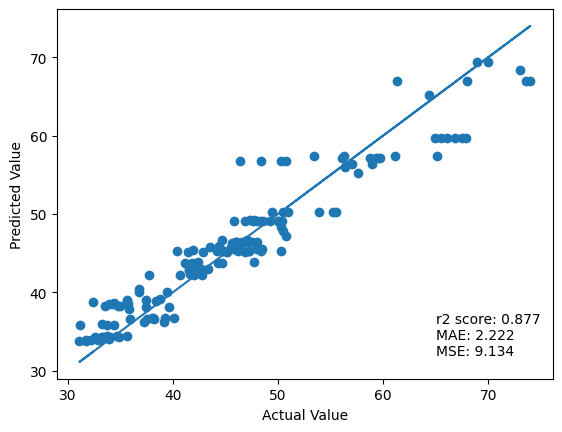

In [ ]:
# Now, let's see the performance on our held out test set
rf_model = RandomForestRegressor(**grid_search.best_params_).fit(X_train,y_train)
print('training score: ',r2_score(rf_model.predict(X_train),y_train).round(3))
print('test score: ', r2_score(rf_model.predict(X_test),y_test).round(3))

#parity plot
plt.scatter(y_test, rf_model.predict(X_test))
plt.plot(y_test,y_test)
plt.text(65,36, s ='r2 score: {}'.format(r2_score(rf_model.predict(X_test), y_test).round(3)))
plt.text(65, 34, s ='MAE: {}'.format(mean_absolute_error(rf_model.predict(X_test), y_test).round(3)))
plt.text(65, 32, s ='MSE: {}'.format(mean_squared_error(rf_model.predict(X_test), y_test).round(3)))
plt.xlabel('Actual Value')
_ = plt.ylabel('Predicted Value')

<Axes: ylabel='feature'>

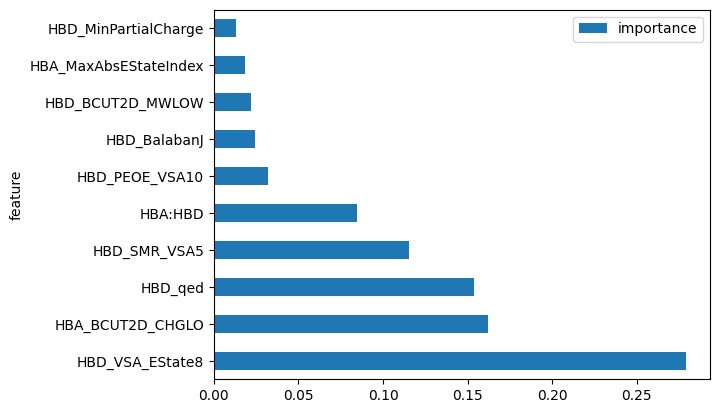

In [ ]:
#Analizing most important features
df_ft_imp_rf = pd.DataFrame({'feature': rf_model.feature_names_in_,'importance': rf_model.feature_importances_}).sort_values('importance',ascending=False)
df_ft_imp_rf.head(10).plot.barh('feature','importance')

# Conclusion
Some things to keep in mind about Random Forest:
*   It's a fairly robust model, and usually doesn't overfit
*   As it's a tree based model, scaling of the data is not required
*   It's not good at extrapolation, see here: https://www.kaggle.com/code/carlmcbrideellis/extrapolation-do-not-stray-out-of-the-forest





